In [1]:
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
torch version: 2.5.0
torchvision version: 0.20.0


In [2]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

try:
    from going_modular.going_modular import data_setup, engine
except:
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
def set_seeds(seed: int=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [5]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[.229, 0.224, 0.225])

In [6]:
import os
import random
import shutil

def copy_random_images_from_directories_to_new_dir(source_dirs, dest_dir, num_images_per_dir):
    """
    Copies random images from multiple source directories into a single destination directory.
    
    :param source_dirs: List of source directories from which to select images.
    :param dest_dir: Destination directory where selected images will be copied.
    :param num_images_per_dir: Number of random images to select from each directory.
    """
    # Create destination directory if it doesn't exist
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
        print(f"Created destination directory: {dest_dir}")
    
    # Supported image file extensions
    image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')
    
    for source_dir in source_dirs:
        # Get all image files in the current source directory
        images = [img for img in os.listdir(source_dir) if img.endswith(image_extensions)]
        
        # If there are fewer images than requested, adjust the number to avoid errors
        num_images_to_copy = min(num_images_per_dir, len(images))
        
        # Randomly select the required number of images
        selected_images = random.sample(images, num_images_to_copy)
        
        # Copy each selected image to the destination directory
        for img_file in selected_images:
            src_path = os.path.join(source_dir, img_file)
            dest_path = os.path.join(dest_dir, img_file)
            
            shutil.copy(src_path, dest_path)
            print(f"Copied {img_file} from {source_dir} to {dest_dir}")

source_dirs = [
    '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/processed_lsd_jpgs',
    '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/processed_osf_jpgs',
    '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/processed_spider_jpgs',
    '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/processed_tseg_jpgs'
]
dest_dir = '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data2'
num_images_per_dir = 75
copy_random_images_from_directories_to_new_dir(source_dirs, dest_dir, num_images_per_dir)


Created destination directory: /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data2
Copied 0293.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/processed_lsd_jpgs to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data2
Copied 0192.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/processed_lsd_jpgs to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data2
Copied 0392.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/processed_lsd_jpgs to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data2
Copied 0430.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/processed_lsd_jpgs to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data2
Copied 0506.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/processed_lsd_jpgs to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data2
Copied 0155.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/processed_lsd_jpgs to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data2
Copied 0482.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/processed_l

In [7]:
import os
import random
import shutil

def copy_random_images_from_directories_to_new_dir(source_dirs, dest_dir, num_images_per_dir):
    """
    Copies random images from multiple source directories into a single destination directory.
    
    :param source_dirs: List of source directories from which to select images.
    :param dest_dir: Destination directory where selected images will be copied.
    :param num_images_per_dir: Number of random images to select from each directory.
    """
    # Create destination directory if it doesn't exist
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
        print(f"Created destination directory: {dest_dir}")
    
    # Supported image file extensions
    image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')
    
    for source_dir in source_dirs:
        # Get all image files in the current source directory
        images = [img for img in os.listdir(source_dir) if img.endswith(image_extensions)]
        
        # If there are fewer images than requested, adjust the number to avoid errors
        num_images_to_copy = min(num_images_per_dir, len(images))
        
        # Randomly select the required number of images
        selected_images = random.sample(images, num_images_to_copy)
        
        # Copy each selected image to the destination directory
        for img_file in selected_images:
            src_path = os.path.join(source_dir, img_file)
            dest_path = os.path.join(dest_dir, img_file)
            
            shutil.copy(src_path, dest_path)
            print(f"Copied {img_file} from {source_dir} to {dest_dir}")

source_dirs = [
    '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/random',
]
dest_dir = '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data3'
num_images_per_dir = 275
copy_random_images_from_directories_to_new_dir(source_dirs, dest_dir, num_images_per_dir)


Created destination directory: /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data3
Copied image8780.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/random to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data3
Copied image8563.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/random to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data3
Copied image7973.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/random to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data3
Copied image7886.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/random to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data3
Copied image8496.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/random to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data3
Copied image8352.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/random to /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data3
Copied image7927.jpg from /Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/random to /Users/ishmeetsinghnagi/CODES/Lumbar S

In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

dataset_path = '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data4'
directories = ['Spine', 'No Spine']
# /Users/ishmeetsinghnagi/CODES/Lumbar Spine/No Spine
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

for d in directories:
    os.makedirs(os.path.join(train_dir, d), exist_ok=True)
    os.makedirs(os.path.join(test_dir, d), exist_ok=True)

for d in directories:
    image_dir = os.path.join(dataset_path, d)
    images = os.listdir(image_dir)

    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_images:
        src_path = os.path.join(image_dir, img)
        dest_path = os.path.join(train_dir, d, img)  
        shutil.copy(src_path, dest_path)

    for img in test_images:
        src_path = os.path.join(image_dir, img)
        dest_path = os.path.join(test_dir, d, img) 
        shutil.copy(src_path, dest_path)

print("Train-test split completed.")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data4/Spine'

In [18]:
data_path = '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data4'


In [19]:

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[.229, 0.224, 0.225])

In [20]:
train_dir = '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data4/train'
test_dir = '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data4/test'

In [21]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str, 
    test_dir: str, 
    transform: transforms.Compose, 
    batch_size: int, 
    num_workers: int=NUM_WORKERS):

  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  class_names = train_data.classes

  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )
  return train_datalaoder, test_dataloader, class_names


In [22]:
manual_transforms = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.ToTensor(),
    normalize
]) # can also use automatic transforms using weights.transforms()

train_dataloaders, test_dataloaders, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=32
)

train_dataloaders, test_dataloaders, class_names

(<torch.utils.data.dataloader.DataLoader at 0x316fc5fd0>,
 ['No Spine', 'Spine'])

In [24]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [26]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [27]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1754cb610>,
 ['No Spine', 'Spine'])

In [28]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights 
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

In [29]:
summary(model=model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [30]:
for param in model.features.parameters():
    param.requires_grad = False
    

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [32]:
summary(model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 2]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [33]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [34]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

 20%|██        | 1/5 [01:44<06:57, 104.39s/it]

Epoch: 1 | train_loss: 0.4904 | train_acc: 0.8103 | test_loss: 0.2284 | test_acc: 0.9844


 40%|████      | 2/5 [03:28<05:11, 103.98s/it]

Epoch: 2 | train_loss: 0.1613 | train_acc: 0.9911 | test_loss: 0.0899 | test_acc: 1.0000


 60%|██████    | 3/5 [05:12<03:28, 104.07s/it]

Epoch: 3 | train_loss: 0.0900 | train_acc: 0.9978 | test_loss: 0.0556 | test_acc: 1.0000


 80%|████████  | 4/5 [06:56<01:44, 104.05s/it]

Epoch: 4 | train_loss: 0.0648 | train_acc: 0.9962 | test_loss: 0.0412 | test_acc: 1.0000


100%|██████████| 5/5 [08:40<00:00, 104.07s/it]

Epoch: 5 | train_loss: 0.0468 | train_acc: 0.9978 | test_loss: 0.0329 | test_acc: 1.0000
[INFO] Total training time: 520.439 seconds


[INFO] Couldn't find helper_functions.py, downloading...


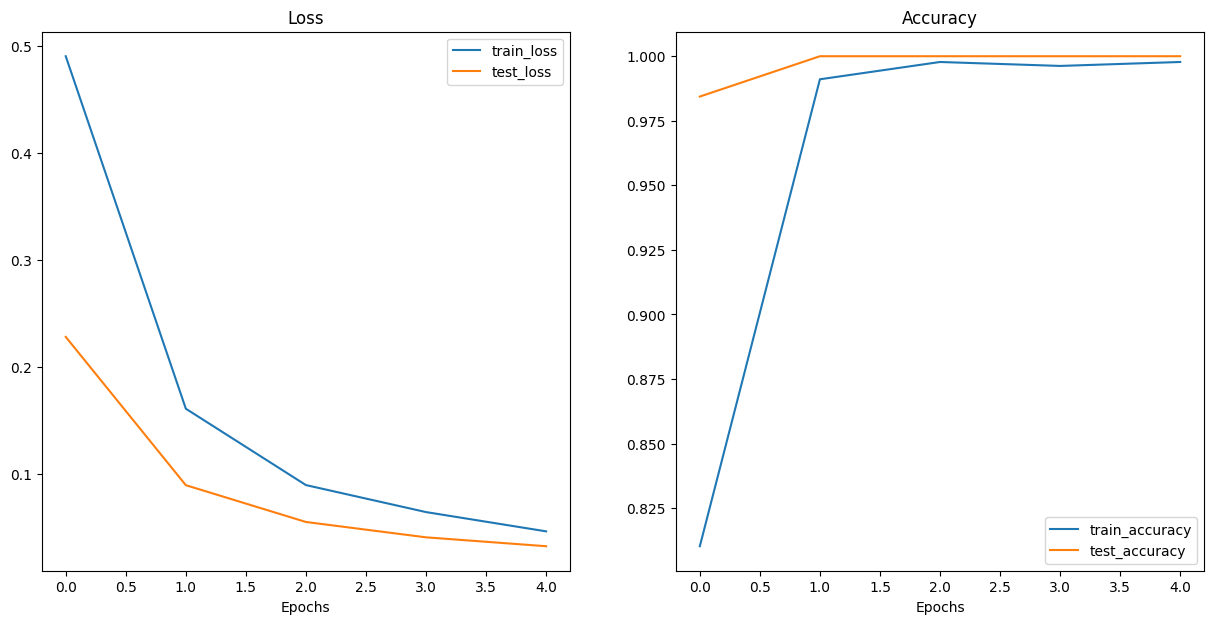

In [35]:
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)

In [36]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str, 
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):
    
    
    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ### 

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))
      target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability 
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

In [38]:
def set_seeds(seed: int=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

RuntimeError: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[.229, 0.224, 0.225])

In [60]:
class_names = ['No Spine',
               'Spine']

In [61]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT

In [62]:
torch.save(model.state_dict(), "model_Spine_Or_No.pth")

In [63]:
model = torchvision.models.efficientnet_b0(weights=weights).to(device)
for param in model.features.parameters():
    param.requires_grad = False

model.classifier = torch.nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, 
              out_features=2,
              bias=True).to(device))

model.load_state_dict(torch.load('model_Spine_Or_No.pth'))


/var/folders/4x/9705y5ws5p31tnxd9bmg3ll00000gn/T/ipykernel_20713/3691180114.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_Spin

<All keys matched successfully>

In [64]:
preprocess = transforms.Compose([
    transforms.Resize(256),    
    transforms.CenterCrop(224),  
    transforms.ToTensor(),      
    transforms.Normalize(        
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    )
])


In [69]:
from PIL import Image
img_path = '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/random/image7662.jpg'  # Replace with your image path
image = Image.open(img_path).convert('RGB')
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  


In [70]:
input_batch = input_batch.to(device)


In [71]:
model.eval()

with torch.no_grad():
    output = model(input_batch)  
_, predicted_idx = torch.max(output, 1)


In [72]:
predicted_class = class_names[predicted_idx.item()]

print(f'Predicted class: {predicted_class}')


Predicted class: No Spine


In [75]:
import os
import random
from PIL import Image
import torch
from torchvision import transforms
import torch.nn.functional as F

def predict_image_class2(image_path, model, class_names, device='cpu', confidence_threshold=50):
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    image = Image.open(image_path).convert('RGB')
    tensor = preprocess(image)
    batch = tensor.unsqueeze(0)
    
    batch = batch.to(device)
    model.eval()
    
    with torch.no_grad():
        output = model(batch)
        probabilities = F.softmax(output, dim=1)
        
        _, predicted_idx = torch.max(output, 1)
        confidence = probabilities[0][predicted_idx].item() * 100  
    
    return predicted_class, confidence

def predict_images_in_directory(directory_path, model, class_names, device='cpu', confidence_threshold=50):
    predictions = {}
    
    image_files = [f for f in os.listdir(directory_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    selected_files = random.sample(image_files, min(20, len(image_files)))
    
    for filename in selected_files:
        image_path = os.path.join(directory_path, filename)
        predicted_class, confidence = predict_image_class2(image_path, model, class_names, device, confidence_threshold)
        predictions[filename] = {'class': predicted_class, 'confidence': confidence}
    
    return predictions

directory_path = '/Users/ishmeetsinghnagi/CODES/Lumbar Spine/data/random'
predictions = predict_images_in_directory(directory_path, model, class_names, device='cpu')

for image_name, prediction in predictions.items():
    print(f"Image: {image_name}, Class: {prediction['class']}, Confidence: {prediction['confidence']:.2f}%")


Image: image8128.jpg, Class: No Spine, Confidence: 97.53%
Image: image7798.jpg, Class: No Spine, Confidence: 96.92%
Image: image7789.jpg, Class: No Spine, Confidence: 96.51%
Image: image8493.jpg, Class: No Spine, Confidence: 96.14%
Image: image8865.jpg, Class: No Spine, Confidence: 99.50%
Image: image7707.jpg, Class: No Spine, Confidence: 99.72%
Image: image7822.jpg, Class: No Spine, Confidence: 98.52%
Image: image8408.jpg, Class: No Spine, Confidence: 94.56%
Image: image8722.jpg, Class: No Spine, Confidence: 86.18%
Image: image8136.jpg, Class: No Spine, Confidence: 97.82%
Image: image8191.jpg, Class: No Spine, Confidence: 99.79%
Image: image7994.jpg, Class: No Spine, Confidence: 97.96%
Image: image8632.jpg, Class: No Spine, Confidence: 99.41%
Image: image7762.jpg, Class: No Spine, Confidence: 91.38%
Image: image8939.jpg, Class: No Spine, Confidence: 98.15%
Image: image7833.jpg, Class: No Spine, Confidence: 98.88%
Image: image8254.jpg, Class: No Spine, Confidence: 99.90%
Image: image86